In [ ]:
from keras.datasets import cifar10
from keras.saving.legacy.save import load_model
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

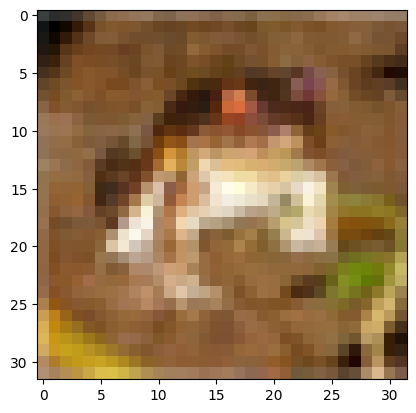

Hinh nay la:  [[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [ ]:
import matplotlib.pyplot as plt
hinh = x_train[0]
plt.imshow(hinh,cmap = plt.cm.binary)
plt.show()
print('Hinh nay la: ',x_train[0])


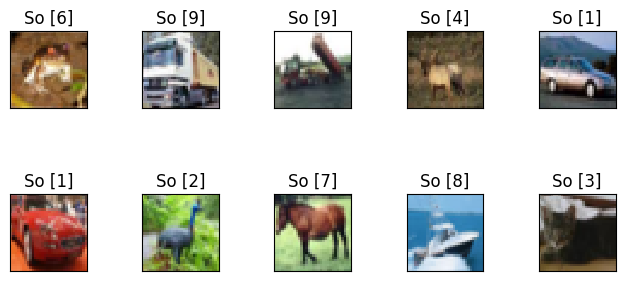

In [ ]:
for i in range(10):
  plt.subplot(3, 5, i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap = 'gray', interpolation = 'none')
  plt.title('So {}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()#ANN
model.add(Dense(512,activation = 'relu',input_shape =(32*32*3,)))
model.add(Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train = x_train.reshape((50000,32*32*3))
x_train = x_train.astype('float32')/255

In [ ]:
x_test = x_test.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255

In [ ]:
#Onehot encoding convert
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])  #loss: hao phi; metrics: do luong
model.fit(x_train,y_train,epochs = 10,batch_size =128)  #epochs: lan hoc ; batch_size: so luong du lieu trong 1 lan hoc
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Loss:',test_loss)
print('Accuracy:',test_acc)

Epoch 1/10
391/391 [==============================] - 13s 31ms/step - loss: 2.2638 - accuracy: 0.2625
Epoch 2/10
391/391 [==============================] - 12s 30ms/step - loss: 1.8033 - accuracy: 0.3542
Epoch 3/10
391/391 [==============================] - 12s 30ms/step - loss: 1.7146 - accuracy: 0.3879
Epoch 4/10
391/391 [==============================] - 12s 30ms/step - loss: 1.6574 - accuracy: 0.4107
Epoch 5/10
391/391 [==============================] - 12s 30ms/step - loss: 1.6192 - accuracy: 0.4257
Epoch 6/10
391/391 [==============================] - 14s 37ms/step - loss: 1.5856 - accuracy: 0.4381
Epoch 7/10
391/391 [==============================] - 12s 30ms/step - loss: 1.5608 - accuracy: 0.4463
Epoch 8/10
391/391 [==============================] - 12s 30ms/step - loss: 1.5427 - accuracy: 0.4550
Epoch 9/10
391/391 [==============================] - 13s 33ms/step - loss: 1.5188 - accuracy: 0.4630
Epoch 10/10
313/313 [==============================] - 2s 5ms/step - loss: 1.5584 

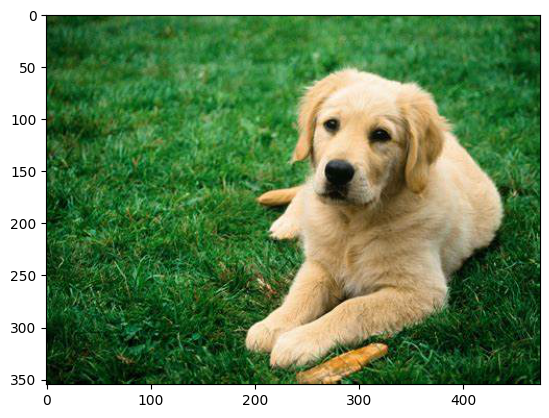

In [ ]:
model.save('test1.h5')
model10 = load_model('test1.h5')
img=plt.imread('/content/dog.jpg')
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 87ms/step


array([2])

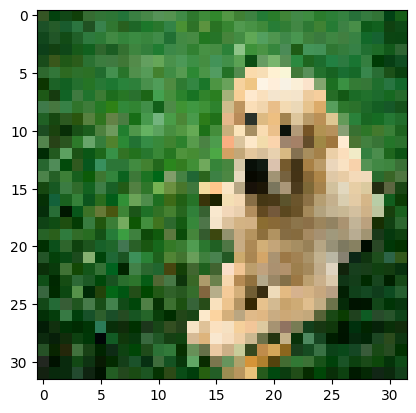

In [ ]:
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

img = load_img('/content/dog.jpg', target_size = (32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 32*32*3)
img = img.astype('float32')
img = img / 255
np.argmax(model.predict(img),axis = -1)